<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Segmentación de países

Crear un modelo de segmentación para la clasificación de paises por categoría (desarrollado, en desarrollo, subdesarollado) según sus datos a nivel macro<br>
v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle"></div>

In [2]:
if os.access('Country-data.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/Country-data.csv > Country-data.csv
    else:
        !wget Country-data.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/Country-data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  9229  100  9229    0     0   9229      0  0:00:01 --:--:--  0:00:01 26828


### `Country-data.csv`:
El dataset **`Country-data.csv`** contiene datos a nivel macroeconomía, ingresos y poblacional sobre países del mundo para su segmentación.<br>
[Dataset source](Country-data.csvn)
- **country** --> nombre del país
- **child_mort** --> cuantos niños menores a 5 años mueren de cada 1000
- **exports** --> exportación de bienes y servicios per cápita
- **health** --> inversiones en salud per cápita
- **import** --> importación de bienes y servicios per cápita
- **Income** --> ingresos por persona (neto)
- **Inflation** --> inflación anual
- **life_expec** --> Promedio de expectativa de vida
- **total_fer** --> Cuantos niños por pareja hay en promedio
- **gdpp** --> Producto bruto interno per cápita

In [3]:
df = pd.read_csv("Country-data.csv")

# Procesar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle"></div>

In [4]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000
Nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
# Alumno: ¿Cuántas filas/datos hay para analizar?
print('Datos disponibles para analizar: ', df.shape[0])

Datos disponibles para analizar:  167


# Explorar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle"></div>

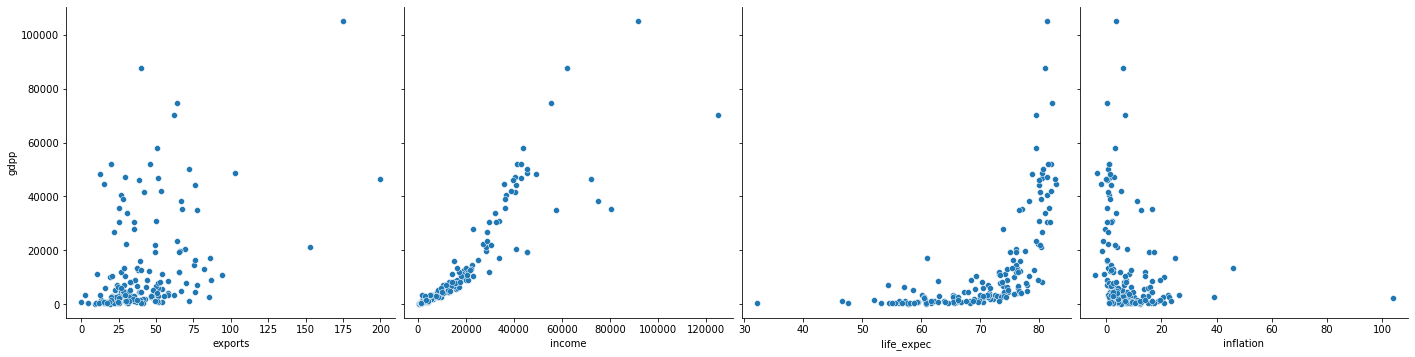

In [7]:
# Observar todas las relaciones entre el feature del producto bruto interno
# y los siguientes features
# Utilizar pairplot con y_vars=['gdpp']
# Utilizar pairplot con x_vars=['exports', 'income', 'life_expec', 'inflation']
# Recordar desactivar la diagonal(diag_kind=None,)
pp = sns.pairplot(data=df, x_vars=['exports', 'income', 'life_expec', 'inflation'], y_vars=['gdpp'], diag_kind=None, height=5)
plt.show()

Deberían observar que a medida que aumenta el producto bruto interno aumenta la exportación, el ingreso por persona (incoma), la expectativa de vida (life_expec) y baja la inflación (inflation). Este parámetro lo debe utilizar luego para determinar si los paises segmentados son:
- desarrollados
- en_desarrollo
- subdesarrollados

# Entrenar modelo
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle"></div>

In [8]:
# Almuno: Crear un numpy array "X" con los features de entrada expecto el nombre del pais (country)
X = df.drop('country', axis=1).values

#### Crear un modelo de segmentación con Kmeans
Parámetros
- n_clusters --> (k) número de clusters/grupos (defecto 5)
- init --> método utilizado para determianr donde comienzan los clusters
 - k-means++ --> mecanismo inteligente para determinar el comienzo (defecto)
 - random --> los centros se determinarn aleatoriamente
- max_iter --> cantidad de iteración (defecto 300)

In [9]:
# Almuno: Entrenar un modelo de Kmeans en un rango de cluster (2, 10)
# Conservar el resultado de "inertial" para utilizar como métrica de selccion
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters = list(range(2, 11))
ensayos = len(n_clusters)

ssd = np.zeros((ensayos))
score = np.zeros((ensayos))

for i in range(ensayos): 
    kmeans = KMeans(n_clusters=n_clusters[i], init="k-means++", random_state=0)
    kmeans.fit(X)
    ssd[i] = kmeans.inertia_
    score[i] = silhouette_score(X, kmeans.labels_)

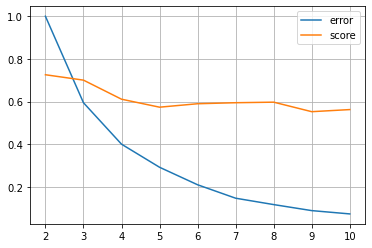

In [10]:
# Dibujar la evolucion del error (inertia) y deteminar el 
# punto de quiebre (elbow point)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(n_clusters, ssd/ssd.max(), label='error')
ax.plot(n_clusters, score, label='score')
ax.grid('dashed')
ax.legend()
plt.show()

Se puede observar que el punto de elbow podría ser con cluster=4, pero ya sabemos de ante mano que queremos dividir el dataset en 3 grupos, utilizaremos n_clusters=3

In [11]:
# Alumno: Entrenar el modelo con el mejor n_clusters=3
# y determinar los labels
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=0)
kmeans.fit(X)
labels = kmeans.predict(X)

In [12]:
# Alumno: Sumar la columna de labels con el nombre de countryseg (customer segmentation)
# a su dataset
df['countryseg'] = labels

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [13]:
# Alumno: Calcular la exactitud (accuracy) del modelo
from sklearn.metrics import silhouette_score
silhouette_score (X, kmeans.labels_)

0.7003508054481694

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

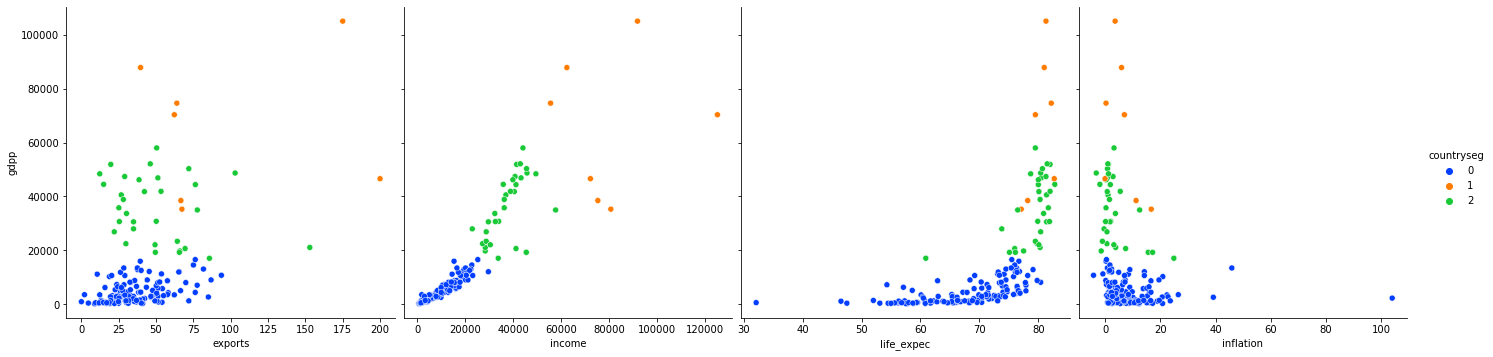

In [14]:
# Alumno: Volver a repetir el gráfico de pairplot que realizó antes
# con ['exports', 'income', 'life_expec', 'inflation']
# pero ahora utilizando para hue la columna countryseg
sns.pairplot(data=df, x_vars=['exports', 'income', 'life_expec', 'inflation'], y_vars=['gdpp'], diag_kind=None, height=5, hue='countryseg', palette='bright')
plt.show()

In [15]:
# Alumno: viendo los gráficos, principalmente el de ingresos (income), deteminar
# la categoría de cada cluster y colocarla en una columna countrycat.
# Utilizar lambda expresion en función de country_seg para crear
# esa nueva coulmna
# - desarrollado
# - desarrollandose
# - subdesarrollado

In [16]:
df['countrycat'] = df['countryseg'].apply(lambda x: 'desarrollado' if x==1 else 'desarrollandose' if x==2 else 'subdesarrollado')

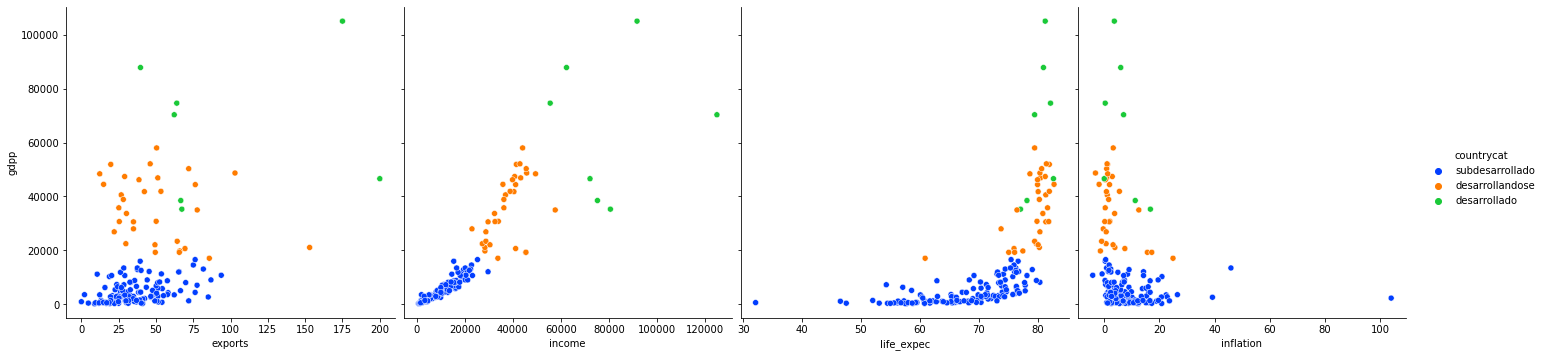

In [17]:
# Alumno: volver a graficar el gráfico anterior pero ahora usando en 
# en hue = 'countrycat'
sns.pairplot(data=df, x_vars=['exports', 'income', 'life_expec', 'inflation'], y_vars=['gdpp'], diag_kind=None, height=5, hue='countrycat', palette='bright')
plt.show()

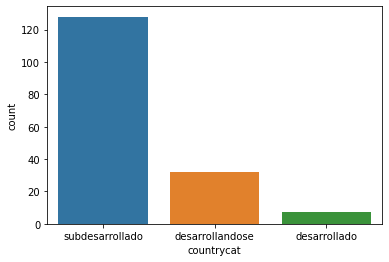

In [18]:
# Alumno: Determinar cuantas países hay en cada categoría
# utilizando el gráfico de seaborn countplot en la columna countrycat
ax = sns.countplot(x=df['countrycat'])

Bueno ahora a jugar! Ahora puede buscar en su dataset algún país en general y ver su categoría según el modelo que armó

In [19]:
df[df['country'] == 'Argentina']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,countryseg,countrycat
5,Argentina,14.5,18.9,8.1,16.0,18700,20.9,75.8,2.37,10300,0,subdesarrollado


In [20]:
df[df['country'] == 'Australia']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,countryseg,countrycat
7,Australia,4.8,19.8,8.73,20.9,41400,1.16,82.0,1.93,51900,2,desarrollandose


In [21]:
df[df['countrycat'] == 'desarrollado']['country']

23          Brunei
82          Kuwait
91      Luxembourg
114         Norway
123          Qatar
133      Singapore
145    Switzerland
Name: country, dtype: object

# Conclusión
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline7.png" width="1000" align="middle">

El modelo que se armó eligió muy pocos paises como "desarrollados", y esto es porque esos paises elegidos se escapan del promedio bastante, son casi "outliers" o atípicos. Hay muy pocos datos como para sacarlos de la lista, se puede analizar utilizar otra forma de cluster para que no sean elegidos como los únicos paises desarrollados